In [1]:
cc_data<-read.csv("D:\\R_TXT_MINE_DATA\\creditcard.csv",header = TRUE,
                   stringsAsFactors = FALSE,
                   strip.white = TRUE ,
                   sep = ',')

#checking overall dataset and coverting 'class' as factor variables 
str(cc_data)
cc_data$Class = as.factor(cc_data$Class)
str(cc_data$Class)


'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [2]:
#Taking variable from v1 to v28,Amount & Class (except Time variable)
cc_data_nw = cc_data[,2:31]
head(cc_data_nw)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,0.09079417,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,-0.16697441,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,0.20764287,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,-0.05495192,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,0.75307443,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,-0.37140720,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [32]:
library(scales)
cc_data_nw[,29] = rescale(cc_data_nw[,29], to = c(0,1))
head(cc_data_nw$Amount)

[1] 0.0058237931 0.0001047053 0.0147389219 0.0048071010 0.0027242834
[6] 0.0001428507

In [33]:
# install.packages('caTools')
# Splitting the dataset into the Training set and Test set
#SPLITING DATA AS 80:20 RATIO FOR TRANING & TEST
library(caTools)
set.seed(123)
split = sample.split(cc_data_nw$Class, SplitRatio = 0.8)
cred_crd_traing = subset(cc_data_nw, split == TRUE)
cred_crd_test = subset(cc_data_nw, split == FALSE)
summary(cred_crd_traing $Class)
summary(cred_crd_test$Class)
# Logistic classifier for Over sampling dataset
logit_cc = glm(formula = Class ~ V14+V10+V4, #V21+V22+,
                      data = cred_crd_traing,family=binomial(link="logit"))
summary(logit_cc)

0      1 
227452    394

0     1 
56863    98


Call:
glm(formula = Class ~ V14 + V10 + V4, family = binomial(link = "logit"), 
    data = cred_crd_traing)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.3807  -0.0308  -0.0230  -0.0172   4.6857  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.19255    0.11397 -71.884  < 2e-16 ***
V14         -0.72496    0.04437 -16.338  < 2e-16 ***
V10         -0.45325    0.05640  -8.037 9.22e-16 ***
V4           0.48825    0.04339  11.253  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5799.1  on 227845  degrees of freedom
Residual deviance: 1967.5  on 227842  degrees of freedom
AIC: 1975.5

Number of Fisher Scoring iterations: 10


In [34]:
y_predict <- predict(logit_cc,cred_crd_test , type="response")  # predicted scores
head(y_predict)


4            5            8           11           16           20 
2.292633e-04 5.389326e-04 3.224013e-04 7.244640e-05 2.085186e-04 6.284213e-05

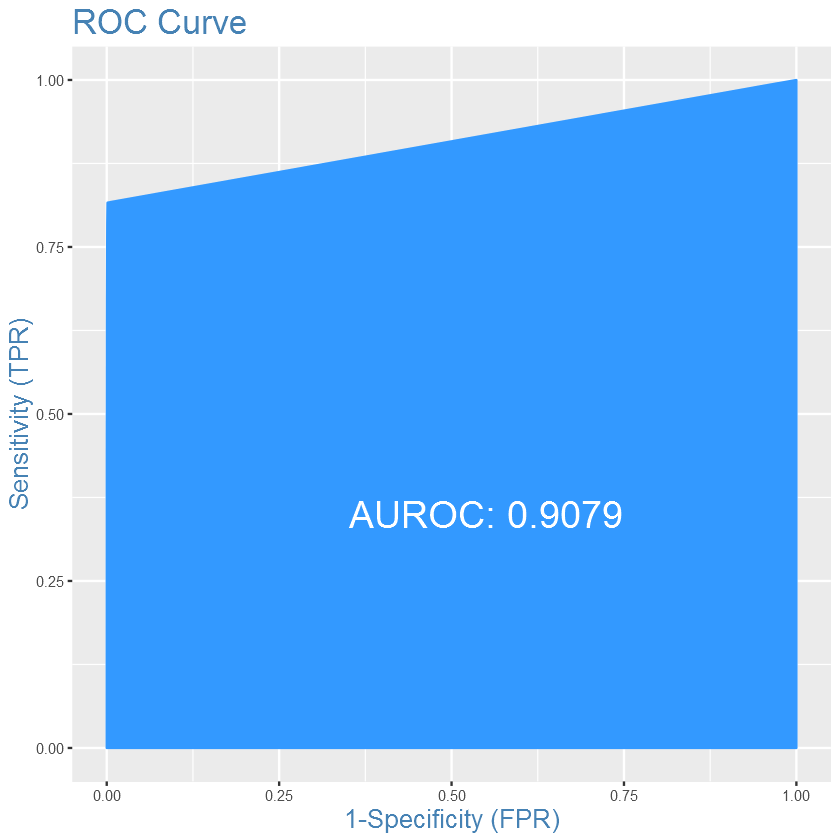

In [35]:
library(pROC)
library(InformationValue)
plotROC(cred_crd_test$Class,y_predict)
